In [29]:
import pickle #read pickle file
import gzip #read zipped pickle file
import matplotlib.pyplot as plt #plot histograms
import mplhep as hep
import numpy as np
# from coffea import hist
import coffea.hist
# import hist
import topcoffea.modules.HistEFT as HistEFT
# import hist
# from hist import Hist

import topcoffea.modules.utils as utils
from topcoffea.scripts.make_html import make_html


hep.style.use("CMS")
params = {'axes.labelsize': 25,
          'axes.titlesize': 25,
          'legend.fontsize':25}
plt.rcParams.update(params)

In [30]:
import ttbarEFT.modules.plotting_tools as pt

## Get SOW for all events

Use value found here for "nSumOfWeights"

```bash
python3 run_processor.py -p sow_processor -x futures --outname TT01j2lCARef_GStrong ../input_samples/sample_jsons/LHCEFT/nanoGen_TT01j2lCARef_GStrong.json 
```

In [3]:
f_sow = "TT01j2lCARef_GStrong_sow.pkl.gz"
hists_sow = utils.get_hist_from_pkl(f_sow, allow_empty=False)
print(hists_sow)

{'sow': <HistEFT (sample,sow) instance at 0x7fc33076c040>, 'sow_norm': <HistEFT (sample,sow_norm) instance at 0x7fc330733850>, 'nevents': <HistEFT (sample,nevents) instance at 0x7fc2f6fc9df0>, 'njets': <HistEFT (sample,njets) instance at 0x7fc2f6fc9820>}


In [4]:
histo = hists_sow["sow"]
histo.set_sm()
print(histo.values())

{('TT01j2l_GStrong',): array([10800.33298935])}


In [4]:
pt_nom= {"ctGIm": -0.5, "ctGRe":-0.5, "cQj38":1.5, "cQj18":1.5, 
            "cQu8":1.5, "cQd8":1.5, "ctj8":1.5, "ctu8":1.5, 
            "ctd8":1.5, "cQj31":1.5, "cQj11":1.5, "cQu1":1.5, 
            "cQd1":1.5, "ctj1":1.5, "ctu1":1.5, "ctd1":1.5}
pt1= {"ctGIm": 0.7, "ctGRe":0.7, "cQj38":9.0, "cQj18":7.0, 
            "cQu8":9.5, "cQd8":12.0, "ctj8":7.0, "ctu8":9.0, 
            "ctd8":12.4, "cQj31":3.0, "cQj11":4.2, "cQu1":5.5, 
            "cQd1":7.0, "ctj1":4.4, "ctu1":5.4, "ctd1":7.0}
pt2= {"ctGIm": 1.0, "ctGRe":1.0, "cQj38":3.0, "cQj18":3.0, 
            "cQu8":3.0, "cQd8":3.0, "ctj8":3.0, "ctu8":3.0, 
            "ctd8":3.0, "cQj31":3.0, "cQj11":3.0, "cQu1":3.0, 
            "cQd1":3.0, "ctj1":3.0, "ctu1":3.0, "ctd1":3.0}

In [6]:
f_nom = "TT01j2lCARef_sow.pkl.gz"
hists_nom = utils.get_hist_from_pkl(f_nom, allow_empty=False)
print(hists_nom)

f1 = "LHCEFT_TT01j2l_ref_sow.pkl.gz"
hists1 = utils.get_hist_from_pkl(f1, allow_empty=False)
print(hists1)

f2 = "LHCEFT_TT01j2l_rob_sow.pkl.gz"
hists2 = utils.get_hist_from_pkl(f2, allow_empty=False)
print(hists2)

{'sow': <HistEFT (sample,sow) instance at 0x7f1702146e20>, 'sow_norm': <HistEFT (sample,sow_norm) instance at 0x7f1701b20b20>, 'nevents': <HistEFT (sample,nevents) instance at 0x7f1701b20fa0>, 'njets': <HistEFT (sample,njets) instance at 0x7f1702154250>}
{'sow': <HistEFT (sample,sow) instance at 0x7f1702146c40>, 'sow_norm': <HistEFT (sample,sow_norm) instance at 0x7f173c166c40>, 'nevents': <HistEFT (sample,nevents) instance at 0x7f173c197430>, 'njets': <HistEFT (sample,njets) instance at 0x7f1702154880>}
{'sow': <HistEFT (sample,sow) instance at 0x7f17027ce9d0>, 'sow_norm': <HistEFT (sample,sow_norm) instance at 0x7f1702154ac0>, 'nevents': <HistEFT (sample,nevents) instance at 0x7f1702154e80>, 'njets': <HistEFT (sample,njets) instance at 0x7f1702154c10>}


In [21]:
# Divide by 400 to get true cross section
sow_norm = hists_nom["sow"]
sow_norm.set_wilson_coefficients(**pt2)
# sow_norm.set_sm()
sow_norm.values()

{('TT01j2l',): array([49191.77096792])}

In [15]:
# Divide by 200 to get true cross section
sow1 = hists1["sow"]
sow1.set_wilson_coefficients(**pt1)
# sow1.set_sm()
sow1.values()

{('LO+1 jet (sample 1)',): array([62521.66038655])}

In [17]:
# Divide by 200 to get true cross section 
sow2 = hists2["sow"]
sow2.set_wilson_coefficients(**pt2)
# sow2.set_sm()
sow2.values()

{('LO+1 jet (sample 2)',): array([23867.40050843])}

## Make plots with samples with original samples and ones with the originals and the SMEFTsim adjustements including the GStrong coupling changes

In [31]:
f = "TT01j2lCARef_plus_Gstsrong.pkl.gz"
hists = utils.get_hist_from_pkl(f, allow_empty=False)
print(hists)

{'tops_pt': <HistEFT (sample,tops_pt) instance at 0x7f9adfcb3d30>, 'avg_top_pt': <HistEFT (sample,avg_top_pt) instance at 0x7f9ae4292a60>, 'l0pt': <HistEFT (sample,l0pt) instance at 0x7f9adfd28880>, 'dr_leps': <HistEFT (sample,dr_leps) instance at 0x7f9ae5fbaca0>, 'ht': <HistEFT (sample,ht) instance at 0x7f9ae5fba460>, 'jets_pt': <HistEFT (sample,jets_pt) instance at 0x7f9ae5fbac70>, 'j0pt': <HistEFT (sample,j0pt) instance at 0x7f9ae5fba4f0>, 'ntops': <HistEFT (sample,ntops) instance at 0x7f9ae5fbaf70>, 'njets': <HistEFT (sample,njets) instance at 0x7f9ae404f970>, 'mtt': <HistEFT (sample,mtt) instance at 0x7f9ae479e700>, 'nleps': <HistEFT (sample,nleps) instance at 0x7f9ae479e880>, 'mll': <HistEFT (sample,mll) instance at 0x7f9ae479ee50>, 'LHE_HT': <HistEFT (sample,LHE_HT) instance at 0x7f9ae479ebe0>, 'LHE_HTIncoming': <HistEFT (sample,LHE_HTIncoming) instance at 0x7f9ae470dc40>, 'sow': <HistEFT (sample,sow) instance at 0x7f9ae4cfdb20>}


figure saved to:  TT01j2l_Gs_SM_njets.png


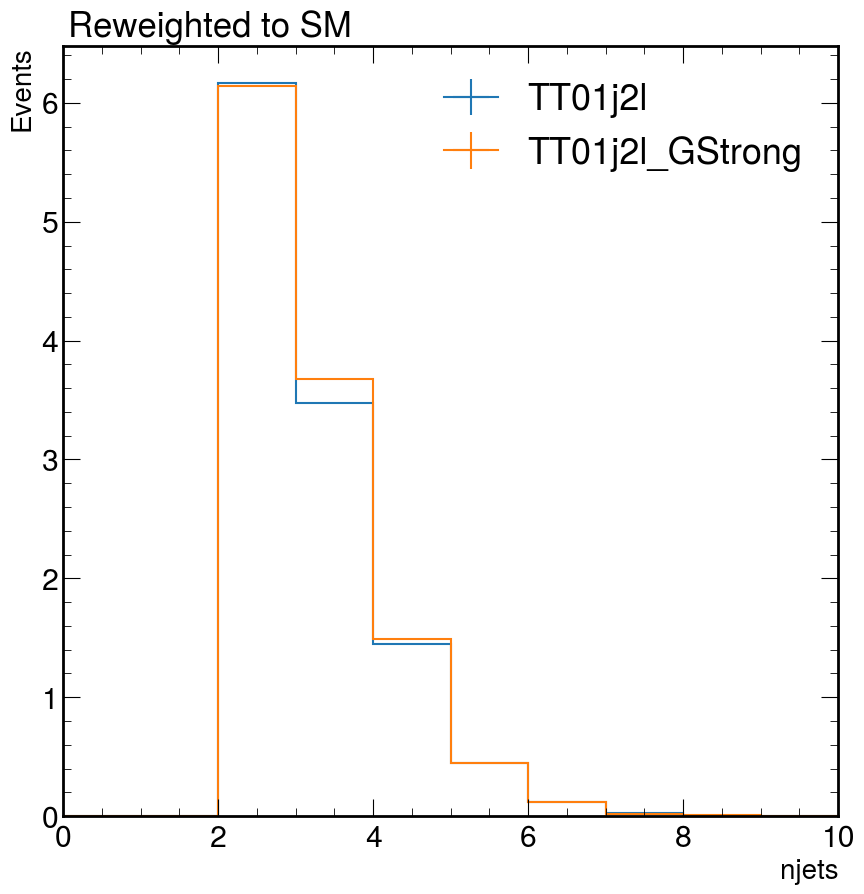

In [18]:
name = "njets"
histo = hists[name]
histo.set_sm()    
fig, ax = plt.subplots(1,1)
coffea.hist.plot1d(histo, ax=ax, stack=False, clear=False)
ax.legend(loc='upper right', fontsize='medium')
plt.figtext(0.13, 0.89, "Reweighted to SM", fontsize=25)
figname = "TT01j2l_Gs_SM_"+name
pt.save_fig_as_png(fig, figname)

figure saved to:  TT01j2l_Gs_ctG2_njets.png
figure saved to:  TT01j2l_Gs_ctG2_l0pt.png
figure saved to:  TT01j2l_Gs_ctG2_mtt.png
figure saved to:  TT01j2l_Gs_ctG2_mll.png
figure saved to:  TT01j2l_Gs_ctG2_dr_leps.png


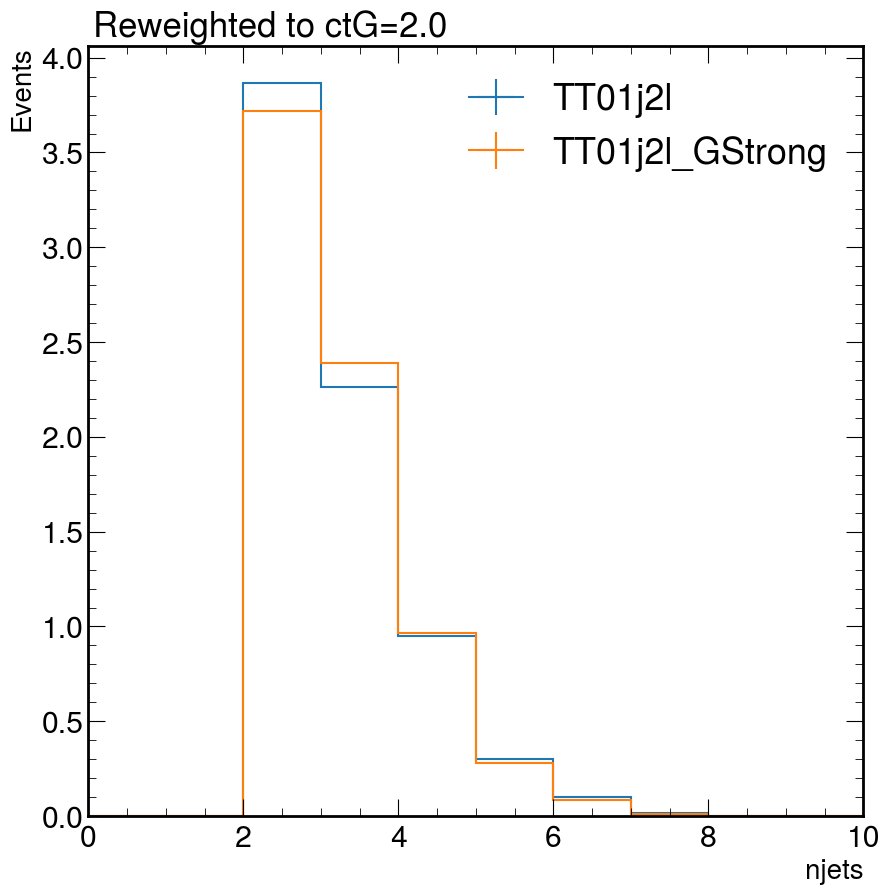

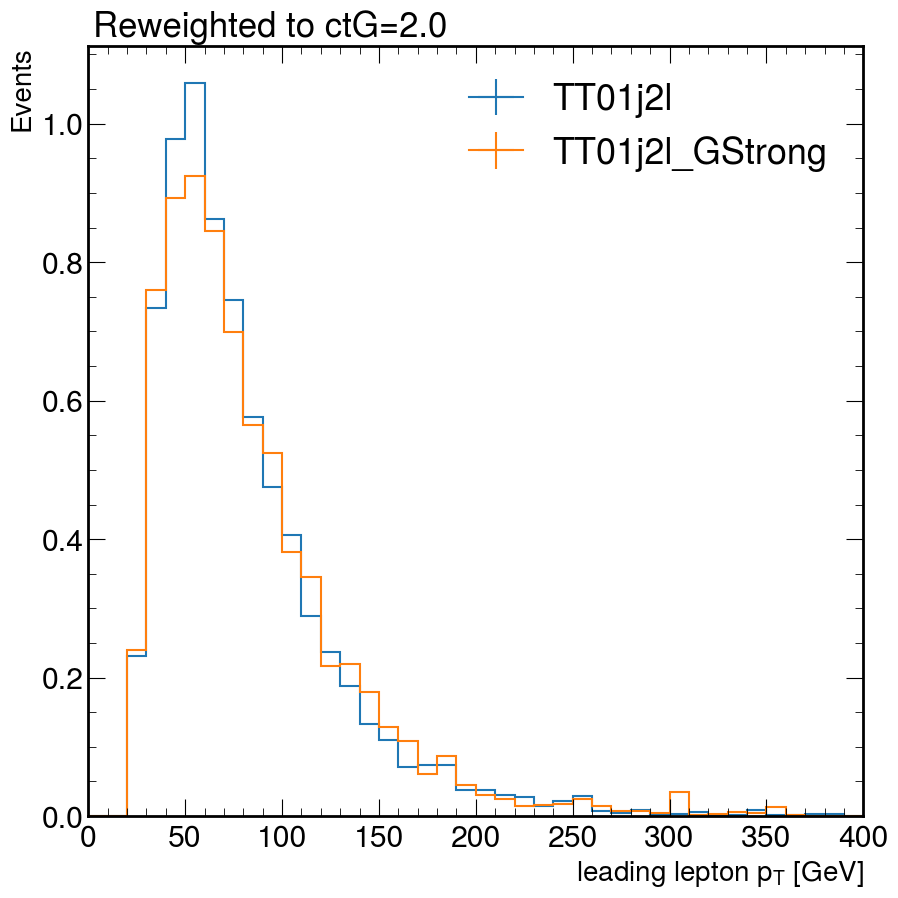

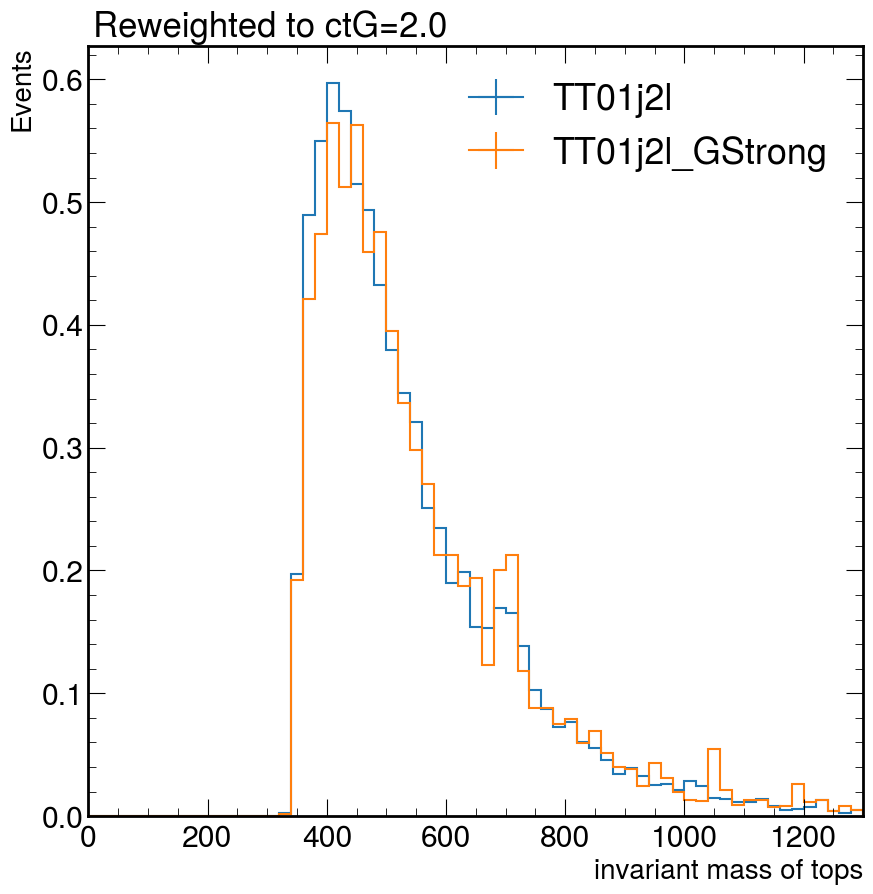

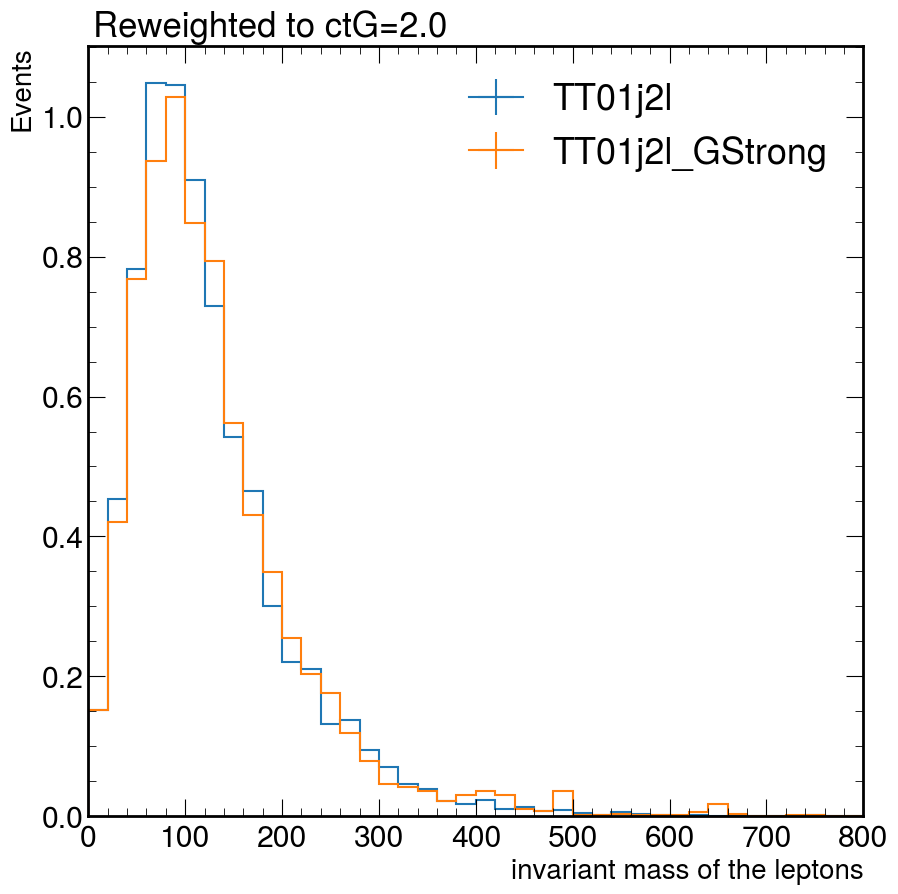

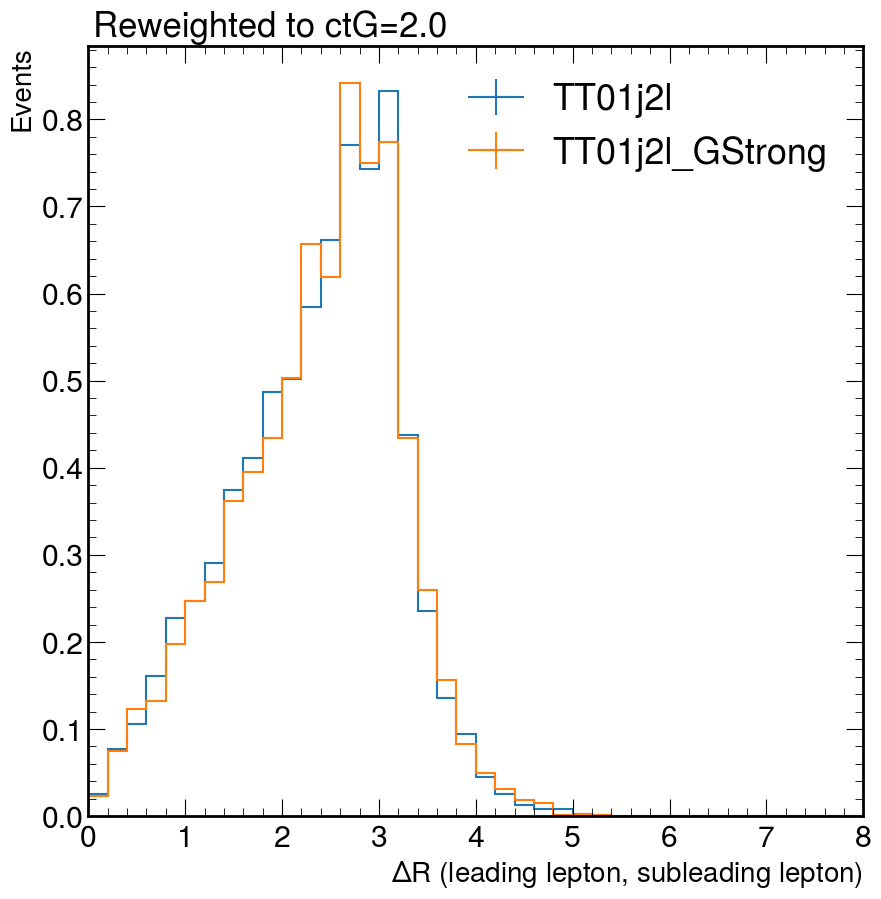

In [28]:
names = ["njets", "l0pt", "mtt", "mll", "dr_leps"]
rwgt_pt = {'ctGRe':2}
for name in names:
    histo = hists[name]
    histo.set_wilson_coefficients(**rwgt_pt)  
    fig, ax = plt.subplots(1,1)
    coffea.hist.plot1d(histo, ax=ax, stack=False, clear=False)
    ax.legend(loc='upper right', fontsize='medium')
    plt.figtext(0.13, 0.89, "Reweighted to ctG=2.0", fontsize=25)
    figname = "TT01j2l_Gs_ctG2_"+name
    pt.save_fig_as_png(fig, figname)

In [35]:
pts = [-5, -2, -1, -0.5, -0.2, 0, 0.2, 0.5, 1, 2, 5]
for item in pts:    
    rwgt_pt = {'ctGRe':item}
    histo = hists["sow"]
    histo.set_wilson_coefficients(**rwgt_pt)
    print("Reweight point: ", rwgt_pt['ctGRe'])
    print(histo.values(), "\n")

Reweight point:  -5
{('TT01j2l_GStrong',): array([50.5050651]), ('TT01j2l',): array([42.61632236])} 

Reweight point:  -2
{('TT01j2l_GStrong',): array([22.63002646]), ('TT01j2l',): array([20.55738443])} 

Reweight point:  -1
{('TT01j2l_GStrong',): array([16.48035927]), ('TT01j2l',): array([15.54201976])} 

Reweight point:  -0.5
{('TT01j2l_GStrong',): array([13.99465299]), ('TT01j2l',): array([13.47264018])} 

Reweight point:  -0.2
{('TT01j2l_GStrong',): array([12.69174997]), ('TT01j2l',): array([12.3712693])} 

Reweight point:  0
{('TT01j2l_GStrong',): array([11.90169826]), ('TT01j2l',): array([11.69546242])} 

Reweight point:  0.2
{('TT01j2l_GStrong',): array([11.1744868]), ('TT01j2l',): array([11.06640783])} 

Reweight point:  0.5
{('TT01j2l_GStrong',): array([10.20149507]), ('TT01j2l',): array([10.2104865])} 

Reweight point:  1
{('TT01j2l_GStrong',): array([8.89404343]), ('TT01j2l',): array([9.0177124])} 

Reweight point:  2
{('TT01j2l_GStrong',): array([7.45739478]), ('TT01j2l',):